### Zipf’s law

<p>Verified Zipf’s law. The jungle book dataset is provided in the "Datasets and Resources" folder. <p>

<p> Provided a list of unique word sorted by their frequency in descending order. Also, a brief discussion of the findings. Used matplotlib library to plot the linear curve, and a log-log curve.</p>



{'the': 3696, 'and': 2321, 'of': 1347, 'to': 1262, 'a': 1147, 'he': 1074, 'in': 742, 'that': 665, 'his': 659, 'i': 587, 'was': 534, 'for': 463, 'is': 460, 'said': 442, 'with': 431, 'as': 422, 'it': 385, 'they': 379, 'on': 378, 'him': 370, 'all': 353, 'but': 333, 'you': 329, 'at': 319, 'not': 307, 'had': 289, 'up': 277, 'or': 242, 'little': 240, 'have': 238, 'when': 213, 'out': 210, 'mowgli': 210, 'be': 206, 'by': 203, 'are': 196, 'one': 191, 'my': 190, 'there': 190, 'down': 188, 'we': 186, 'will': 179, 'were': 177, 'then': 177, 'from': 169, 'this': 168, 'would': 164, 'me': 161, 'no': 151, 'their': 148, 'if': 142, 'them': 142, 'what': 141, 'into': 140, 'jungle': 138, 'very': 138, 'who': 138, 'do': 132, 'so': 131, 'head': 129, 'could': 127, 'go': 119, 'back': 119, 'bagheera': 114, 'where': 112, 'never': 112, 'big': 111, 'like': 110, 'come': 107, 'man': 107, 'now': 105, 'any': 104, 'can': 103, 'nag': 101, 'time': 99, 'more': 99, 'two': 97, 'thou': 97, 'went': 97, 'rikkitikki': 96, 'came':

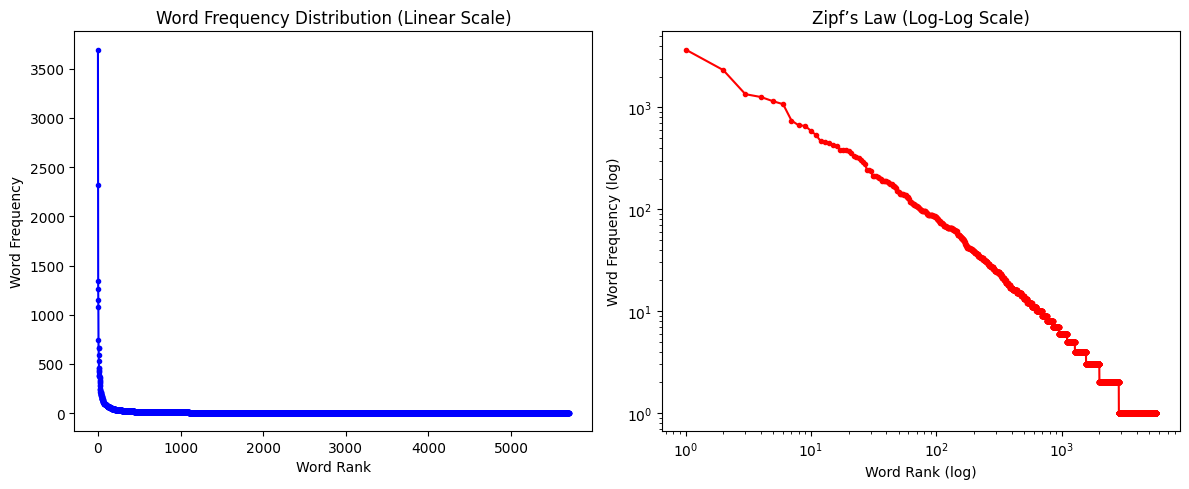

In [ ]:
import matplotlib.pyplot as plt
import string

# The Zipf's law states that the frequency of the words in a text is inversely
# proportional to the rank of the word.
# The higher the frequency of the word in the text, lower the its rank.

try: # this is good for big files, it is memory efficent but slow
    word_freq = {}
    with open("Datasets and resources/jungle_book.txt", "r") as file:
        for line in file:
            words = line.lower().translate(str.maketrans("", "", string.punctuation)).split()
            for word in words:
                word_freq[word] = word_freq.get(word, 0) + 1
    word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))
    print (word_freq)
except Exception:
    print("something went wrong")

try: # this is good for small files, it is memory unefficent but fast
    word_freq = {}
    with open("Datasets and resources/jungle_book.txt", "r") as file:
        text = (file.read()).lower().translate(str.maketrans("", "", string.punctuation))
        words = text.split()
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1
    word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))
    print (word_freq)


    ranks = list(range(1, len(word_freq) + 1))
    print (ranks)
    words = list(word_freq.keys())
    frequencies = list(word_freq.values())

    # Plot 1: Linear Scale
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(frequencies, marker="o", linestyle="-", color="b", markersize=3)
    plt.xlabel("Word Rank")
    plt.ylabel("Word Frequency")
    plt.title("Word Frequency Distribution (Linear Scale)")

    # Plot 2: Log-Log Scale (Zipf's Law Verification)
    plt.subplot(1, 2, 2)
    plt.loglog(range(1, len(frequencies) + 1), frequencies, marker="o", linestyle="-", color="r", markersize=3)
    plt.xlabel("Word Rank (log)")
    plt.ylabel("Word Frequency (log)")
    plt.title("Zipf’s Law (Log-Log Scale)")

    plt.tight_layout()
    plt.show()
except Exception:
    print("something went wrong")

### Pointwise Mutual Information

---



Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative.

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculated the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times were ignored. Listed the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. </p>



In [ ]:
import string
import math
from collections import Counter

try:
    word_freq = {}
    pairs_freq = {}
    with open("Datasets and resources/jungle_book.txt", "r") as file:
        text = (file.read()).lower().translate(str.maketrans("", "", string.punctuation))
        words = text.split()
    for i in range(len(words) - 1):
        word_freq[words[i]] = word_freq.get(words[i], 0) + 1
    word_freq[words[-1]] = word_freq.get(words[-1], 0) + 1

    # Deletion of rare words repeted less then 10 times
    for key in list(word_freq.keys()):
        if word_freq[key] < 10:
            del word_freq[key]
    filtered_words = []
    for word in words:
        if word in word_freq:
            filtered_words.append(word)
    words = filtered_words
    print (len(words))
    word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))
    print(word_freq)

    for i in range(len(words) - 1):
        pair = (words[i], words[i + 1])
        pairs_freq[pair] = pairs_freq.get(pair, 0) + 1
    pairs_freq = dict(sorted(pairs_freq.items(), key=lambda x: x[1], reverse=True))
    print (pairs_freq)

    # PMI score calculation
    pmi_scores = {}
    for (w1, w2), c_pair in pairs_freq.items():
        c_w1 = word_freq[w1]
        c_w2 = word_freq[w2]
        numerator = c_pair * len(words) - 1 #N
        denominator = c_w1 * c_w2
        pmi = math.log(numerator / denominator)
        pmi_scores[(w1, w2)] = pmi
    # Sort PMI scores
    sorted_pmi = sorted(pmi_scores.items(), key=lambda x: x[1], reverse=True)

    print("Top 30 highest PMI scores:\n")
    for pair, pmi in sorted_pmi[:30]:
        print(f"{pair[0]} {pair[1]} -> PMI: {pmi:.4f}")

    print("\nBottom 30 lowest PMI scores:\n")
    for pair, pmi in sorted_pmi[-30:]:
        print(f"{pair[0]} {pair[1]} -> PMI: {pmi:.4f}")
except:
    print("something went wrong")

#      Observations:
# PMI is effective for identifying strong word associations.
# If two words occur together more often than by chance -> high PMI
# If they occur together less than by chance -> low or negative PMI
# Positive score means there is a relationship between 2 words of occuring together in the text.
# Negative socre means there is a relationship between 2 words of avoiding each other.
# 0 score means the relationship between 2 words is missing.

44098
{'the': 3696, 'and': 2321, 'of': 1347, 'to': 1262, 'a': 1147, 'he': 1074, 'in': 742, 'that': 665, 'his': 659, 'i': 587, 'was': 534, 'for': 463, 'is': 460, 'said': 442, 'with': 431, 'as': 422, 'it': 385, 'they': 379, 'on': 378, 'him': 370, 'all': 353, 'but': 333, 'you': 329, 'at': 319, 'not': 307, 'had': 289, 'up': 277, 'or': 242, 'little': 240, 'have': 238, 'when': 213, 'out': 210, 'mowgli': 210, 'be': 206, 'by': 203, 'are': 196, 'one': 191, 'my': 190, 'there': 190, 'down': 188, 'we': 186, 'will': 179, 'were': 177, 'then': 177, 'from': 169, 'this': 168, 'would': 164, 'me': 161, 'no': 151, 'their': 148, 'if': 142, 'them': 142, 'what': 141, 'into': 140, 'jungle': 138, 'very': 138, 'who': 138, 'do': 132, 'so': 131, 'head': 129, 'could': 127, 'go': 119, 'back': 119, 'bagheera': 114, 'where': 112, 'never': 112, 'big': 111, 'like': 110, 'come': 107, 'man': 107, 'now': 105, 'any': 104, 'can': 103, 'nag': 101, 'time': 99, 'more': 99, 'two': 97, 'thou': 97, 'went': 97, 'rikkitikki': 96, '

### Wikipedia language model

<p> I have implement a 2-gram language model in Python from scratch. Calculated Bigram Probabilities with Back-off. Included a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, documented my findings, drawbacks, and potential improvements.</p>



<h4> Datasets and Resources </h4>

* WikiText-2 (raw/unprocessed), Train, Dev, Test

In [1]:
import math
from collections import defaultdict, Counter
import string
import random

def load_dataset(path):
    with open(path, 'r') as f:
        text = (f.read()).lower().translate(str.maketrans("", "", string.punctuation))
        return text.split()

def count_unigrams_bigrams(tokens):
    unigram_freq = {}
    bigram_freq = {}

    for i in range(len(tokens)):
        unigram = tokens[i]
        unigram_freq[unigram] = unigram_freq.get(unigram, 0) + 1

        if i < len(tokens) - 1:
            bigram = (tokens[i], tokens[i+1])
            bigram_freq[bigram] = bigram_freq.get(bigram, 0) + 1
    total_tokens = len(tokens)
    return total_tokens, unigram_freq, bigram_freq

def get_bigram_probability(w1, w2, unigram_freq, bigram_freq, alpha=0.4):
    bigram = (w1, w2)
    vocab_size = len(unigram_freq)
    total_unigrams = sum(unigram_freq.values())

    if bigram in bigram_freq and unigram_freq.get(w1, 0) > 0:
        return bigram_freq[bigram] / unigram_freq[w1]
    else:
        # smoothed unigram probability for back-off
        backoff_prob = (unigram_freq.get(w2, 0) + 1) / (total_unigrams + vocab_size)
        if backoff_prob == 0:
            backoff_prob = 1 / (total_unigrams + vocab_size)  # Smoothing for unknown w2
        return max(alpha * backoff_prob, 1e-12)


def predict_next_word(w1, unigram_freq, bigram_freq):
    candidates = {}
    for word in unigram_freq:
        prob = get_bigram_probability(w1, word, unigram_freq, bigram_freq)
        candidates[word] = prob
    sorted_candidates = sorted(candidates.items(), key=lambda x: x[1], reverse=True)
    return sorted_candidates[:100]

# In general, perplexity is a measurement of how well a probability model predicts a word.
# In the context of Natural Language Processing, perplexity is one way to evaluate language models
def perplexity(tokens, unigram_counts, bigram_counts, total_tokens):#Perplexity(W)=exp(−1/N∑logP(wi∣wi+1)) //https://huggingface.co/docs/transformers/en/perplexity
    log_prob_sum = 0
    N = len(tokens) - 1
    for i in range(N):
        w1, w2 = tokens[i], tokens[i+1]
        prob = get_bigram_probability(w1, w2, unigram_counts, bigram_counts)
        log_prob_sum += math.log(prob or 1e-12)
    return math.exp(-log_prob_sum / N)

valid_tokens = load_dataset("Datasets and resources/wikitext-2-raw-v1/wikitext-2-raw/wiki.valid.raw")
test_tokens = load_dataset("Datasets and resources/wikitext-2-raw-v1/wikitext-2-raw/wiki.test.raw")
train_tokens = load_dataset("Datasets and resources/wikitext-2-raw-v1/wikitext-2-raw/wiki.train.raw")

total_tokens, unigram_freq, bigram_freq = count_unigrams_bigrams(train_tokens)
input_word = "the"
predictions = predict_next_word(input_word, unigram_freq, bigram_freq)

print(f"Top next word predictions for '{input_word}':")
for word, prob in predictions:
    print(f"{input_word} {word} -> {prob:.6f}")

ppl = perplexity(valid_tokens, unigram_freq, bigram_freq, total_tokens)
print("##############################")
print("Test Perplexity:", ppl)


# The word "the" is the most reapeted one
# If the alpha is multiplied then
# With the text meant for test by backoff, the perplexity is 916
# With the text meant for validation backoff, the perplexity is 849
# The Perplexity score is high and that means it is not a good model((
# As an improvment I could add some 'nan' instead of words that deos not appear in the model

Top next word predictions for 'the':
the first -> 0.017030
the of -> 0.012519
the song -> 0.008771
the to -> 0.008676
the game -> 0.007272
the same -> 0.006974
the united -> 0.006691
the city -> 0.005781
the new -> 0.005774
the second -> 0.005720
the most -> 0.005506
the album -> 0.005475
the film -> 0.005055
the was -> 0.004612
the end -> 0.004519
the episode -> 0.004435
the two -> 0.004229
the time -> 0.004099
the series -> 0.004084
the british -> 0.003701
the world -> 0.003579
the church -> 0.003441
the season -> 0.003349
the other -> 0.003288
the following -> 0.003288
the next -> 0.003288
the us -> 0.003219
the north -> 0.003219
the that -> 0.003150
the main -> 0.003112
the for -> 0.003028
the final -> 0.002975
the original -> 0.002959
the last -> 0.002944
the with -> 0.002856
the early -> 0.002829
the south -> 0.002814
the national -> 0.002784
the storm -> 0.002745
the only -> 0.002638
the area -> 0.002623
the war -> 0.002615
the state -> 0.002569
the is -> 0.002567
the year -> 0.